# CSE 5243 - Introduction to Data Mining
## Homework 2: Classification
- Semester: Fall 2024
- Instructor: John Paparrizos
- Section: Tuesdays/Thursdays 11:10 AM
- Student Name: John Smith
- Student Email: smith.12345@osu.edu
- Student ID: 123456789
***

# Introduction

### Objectives

In this lab, you will use the "Cleveland Data CLEANED AND TRIMMED.csv" heart disease dataset provided on Carmen.  It is a subset of the "Cleveland" dataset that can be found here: https://archive.ics.uci.edu/ml/datasets/Heart+Disease

You will configure, execute, and evaluate an off-the-shelf K-Nearest-Neighbor classifier and two other classifiers you choose.

The objectives of this assignment are:
1.	Understand how to evaluate classifiers based on business criteria.
2.	Understand how to tune and evaluate a classifier to achieve good performance.
3.	Understand how to select and evaluate suitable off-the-shelf classifiers based on the characteristics of a dataset and the outcomes you need.

### Problem Statement

You work for a medical institution that wants to improve the heart health of its patients.  You have obtained a dataset that contains a variety of demographic and health-related information for a group of patients.  It also includes a CLASS variable "num" that indicates the heart health of each of the patients.  The values are:

0. No heart health issues / risk
1. Slight heart health issues / risk
2. Moderate heart health issues / risk
3. High heart health issues / risk
4. Extreme heart health issue / risk

You have been asked to develop a classifier based on the dataset data, to predict the CLASS of new patients so they can be enrolled in interventions based on their demographic data.

The COSTs of the interventions are as follows, based on the predicted class of each patient

0) Tiny intervention: 100 (dollars)
1) Minor intervention: 200
2) Moderate intervention: 300
3) Significant intervention: 400
4) Extreme intervention: 500

The BENEFITs of the interventions are as follows:

- If the classification is correct and the correct intervention given to the patient: 500 * (TRUE_CLASS + 1)
- If an incorrect classification is made and the wrong intervention is given to the patient: 0

You would like to find a classifier that maximizes the overall **NET_BENEFIT = BENEFIT - COST**. Therefore, a larger positive number is a good outcome.

So, for example:

- If a patient's true class is 4 and their predicted class is 0, their NET_BENEFIT = 0 - 100 = -100
- If a patient's true class is 4 and they are correctly classified, their NET_BENEFIT is 500*(4+1) - 500 = 2000

The medical institution would like you to evaluate the use of a K-Nearest-Neighbor classifier as a starting point.  You agree to do so, as long as you then can choose a different classifier if you are not satisfied with KNN.

### Collaboration
For this assignment, you should work as an individual. You may informally discuss ideas with classmates, but your work should be your own.

### What you need to turn in:
1)	Code

-	For this homework, the code is the Jupyter Notebook.  Use the provided Jupyter Notebook template, and fill in the appropriate information.
-	You may use common Python libraries for I/O, data manipulation, data visualization, etc. (e.g., NumPy, Pandas, MatPlotLib,…  See reference below.) 
-	You may not use library operations that perform, in effect, the “core” computations for this homework (e.g., If the assignment is to write a K-Means algorithm, you may not use a library operation that, in effect, does the core work needed to implement a K-Means algorithm.).  When in doubt, ask the grader or instructor.
-	The code must be written by you, and any significant code snips you found on the Internet and used to understand how to do your coding for the core functionality must be attributed.  (You do not need to attribute basic functionality – matrix operations, IO, etc.)
-	The code must be commented sufficiently to allow a reader to understand the algorithm without reading the actual Python, step by step.
-	When in doubt, ask the grader or instructor.

2)	Written Report
-	For this homework, the report is the Jupyter Notebook.  The report should be well-written.  Please proof-read and remove spelling and grammar errors and typos.
-	The report should discuss your analysis and observations. Key points and findings must be written in a style suitable for consumption by non-experts.  Present charts and graphs to support your observations. If you performed any data processing, cleaning, etc., please discuss it within the report.

### Grading

1.	Overall readability and organization of your report (5%)
> - Is it well organized and does the presentation flow in a logical manner?
> - Are there no grammar and spelling mistakes?
> - Do the charts/graphs relate to the text?
> - Are the summarized key points and findings understandable by non-experts?
> - Do the Overview and Conclusions provide context for the entire exercise?
2.	Evaluation Method (10%)
> - Does your evaluation method meet the needs of the developer (you) as well as the needs of your business stakeholders?
> - Is the evaluation method sound?
> - Did you describe both the method itself and why you chose it?
3.	Pre-Processing of the Dataset (10%)
> - Did you make reasonable choices for pre-processing, and explain why you made them?
4.	Evaluation of the KNN Classifier (20%)
> - Is your algorithm design and coding correct?
> - Is it well documented?
> - Have you made an effort to tune it for good performance?
> - Is the evaluation sound?
5.	Evaluation of the Second Classifier (20%)
> - Is your algorithm design and coding correct?
> - Is it well documented?
> - Have you made an effort to tune it for good performance?
> - Is the evaluation sound?
6.	Evaluation of the Third Classifier (20%)
> - Is your algorithm design and coding correct?
> - Is it well documented?
> - Have you made an effort to tune it for good performance?
> - Is the evaluation sound?
7.	Comparison of the Three Classifiers (10%)
> - Is the comparison sound?
> - Did you choose a specific classifier as best and explain why?
8.  Conclusions (5%)
> - Did you summarize appropriately your critical findings. 
> - Did you provide appropriate conclusions and next steps.

### How to turn in your work on Carmen:

Submit to Carmen the Jupyter Notebook, the html print out of your Jupyter notebook, and any supporting files that you used to process and analyze this data. You do not need to include the input data.  All submitted files (code and/or report) except for the data should be archived in a *.zip file, and submitted via Carmen.  Use this naming convention:
 
•	Project2_Surname_DotNumber.zip

The submitted file should be less than 10MB.

***

***
# Section: Overview
- Insert a short description of the scope of this exercise, any supporting information, etc.
***

This exercise focused on evaluating the effectiveness of different machine learning classifiers like Random Forest, K-Nearest Neighbors, and Logistic Regression on a medical dataset. The goal was to compare their performance in terms of accuracy and cost to determine which model is best suited for predicting medical conditions. The analysis included considerations of data characteristics, such as class imbalance and feature correlations, which could impact model outcomes. The exercise aims to enhance understanding of how machine learning can support medical decision-making and identify potential areas for further exploration, such as optimizing model performance or incorporating additional features.

***
# Section: Setup
- Add any needed imports, helper functions, etc., here.
***

In [1]:
# Import necessary libraries for data manipulation and analysis
import pandas as pd  # Data manipulation and analysis
import numpy as np   # Numerical operations

# Importing machine learning libraries and tools
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV  # For splitting data and hyperparameter tuning
from sklearn.preprocessing import StandardScaler, label_binarize  # For scaling features and binarizing labels
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve, auc  # For evaluating model performance
from sklearn.neighbors import KNeighborsClassifier  # K-Nearest Neighbors classifier
from sklearn.ensemble import RandomForestClassifier  # Random Forest classifier
from sklearn.linear_model import LogisticRegression  # Logistic Regression classifier
from sklearn import ensemble  # Ensemble methods

# Importing visualization libraries
import seaborn as sns  # Statistical data visualization
import matplotlib.pyplot as plt  # General plotting library

# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings("ignore")

***
# Section: 1 - Evaluation Method
- Define measures for evaluating the classification models you develop.  Explain why the measures you choose provide a useful view into the value and usefulness of the model you eventually chose for the company to use.  Define two types:
***

***
## Section: 1.1 - Define measures that do not include the cost information
- (e.g., confusion matrices, accuracy, precision, recall, F-measures, etc.).
- Consider using: from sklearn.metrics import classification_report, confusion_matrix
***

### ***Traditional classification metrics - provide insight into how well the model predicts outcomes without taking financial costs into account:***

#### Confusion Matrix 
This matrix displays the breakdown of true positives, false positives, true negatives, and false negatives for each class, helping me understand where the model makes errors.

#### Accuracy
Accuracy is the ratio of correctly predicted cases to the total number of cases. However, it might not be very informative if the dataset is imbalanced since it doesn’t differentiate between different types of errors.

#### Precision
Precision measures how many of the predicted positive cases were actually correct, which is important when false positives (misclassifying high-risk individuals) carry significant costs or risks.

#### Recall
Recall calculates the proportion of actual positives that were correctly identified. This is crucial when missing high-risk cases (false negatives) has severe consequences.

#### F1-Score
The F1-score is a combination of precision and recall, offering a balanced measure when both false positives and false negatives are important.

These metrics will give me a solid foundation for assessing the model’s overall performance without considering cost.

In [2]:
def evaluate_classification_metrics(y_true, y_pred):
    """
    Function to evaluate traditional classification metrics.
    Args:
    y_true:  Actual class labels.
    y_pred:  Predicted class labels.
    Returns: Prints confusion matrix, accuracy, precision, recall, and F1-score.
    """
    
    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    print("Confusion Matrix:\n", cm)

    # Classification Report: includes precision, recall, F1-score, and accuracy
    report = classification_report(y_true, y_pred)
    print("Classification Report:\n", report)
    return cm

***
## Section: 1.2 - Define measures that do include the cost information
- (e.g., using cost matrices).
- Consider creating a function that takes a confusion matrix and calculates the cost, like this:
***

In healthcare, the stakes associated with classification decisions are particularly high, making it vital to evaluate models not just on traditional metrics but also on their financial implications. **Incorporating cost information into model evaluation provides critical insights into the real-world effectiveness and value of classification models.** This approach ensures that the decision-making process aligns with the overarching goal of maximizing patient outcomes while minimizing unnecessary costs.


#### Cost Matrix
A cost matrix quantifies the financial impact of misclassifications by detailing the costs associated with assigning incorrect interventions based on the true health status of patients. Each row of the matrix corresponds to the true class (actual health risk), while each column corresponds to the predicted class (model's prediction). The values in the matrix represent the financial costs associated with these predictions.

#### Net Benefit Calculation
The net benefit is derived by considering both the benefits of correct classifications and the costs incurred from misclassifications. This evaluation ensures that the classification model selected aligns with the organization’s goals of improving patient care while managing costs.

In [3]:
# Updated cost matrix where the cost depends on the predicted class
#                           PREDICTED VALUES
#                      0     1     2     3     4    
def total_cost(conf_matrix):
    cost_matrix = [[100, 200, 300, 400, 500],   # True class 0
                   [100, 200, 300, 400, 500],   # True class 1
                   [100, 200, 300, 400, 500],   # True class 2
                   [100, 200, 300, 400, 500],   # True class 3
                   [100, 200, 300, 400, 500]]   # True class 4

    total_benefit = 0
    total = 0
    net_benefit = 0
    
    # With provided conf_matrix
    total = 0
    for r in range(5):  # Iterating through true classes
        for c in range(5):  # Iterating through predicted classes
            con = conf_matrix[r][c]
            total += 100 * (r+1) * con
            if r==c:
                total_benefit += 500 * (c+1) *con
    net_benefit = total_benefit - total
    
    print(f"Total Cost: {total}")
    print(f"Total Benefit: {total_benefit}")
    print(f"Net Benefit: {net_benefit}")
          
    return net_benefit

***
# Section: 2 - Pre-Processing of the Dataset
- Use the provided dataset.  Split it into a Training dataset and a Test dataset based on the class attribute.  Keep them separate and use the Training dataset for training/tuning and the Test dataset for testing. For consistency, use the **train_test_split** operation available in SciKit Learn (use a specific random seed, so it is reproducible).
  - from sklearn.model_selection import train_test_split
  - X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
***

***
## Section: 2.1 - Explore the attributes
- As in Homework 1, explore the attributes briefly. Reference the website listed in the Introduction.
- Provide basic statistics for the attributes.
- List which attributes are Nominal (even though they are encoded as numbers), Ordinal, Interval, Ratio.
***

In [4]:
#  I aim to get an initial overview of the dataset, including its structure, size, and first few rows 
#  to understand what kind of data I would be working with.
#  Apart from giving a glimpse the head function verifies if the data is loaded correctly

data = pd.read_csv('Cleveland Data CLEANED AND TRIMMED.csv')   # loading the dataset
data.head(25)                                     # displaying first 25 rows of the dataset to get a sense of its contents

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,1,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,2,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,3,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,4,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,5,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
5,6,56,1,2,120,236,0,0,178,0,0.8,1,0,3,0
6,7,62,0,4,140,268,0,2,160,0,3.6,3,2,3,3
7,8,57,0,4,120,354,0,0,163,1,0.6,1,0,3,0
8,9,63,1,4,130,254,0,2,147,0,1.4,2,1,7,2
9,10,53,1,4,140,203,1,2,155,1,3.1,3,0,7,1


In [5]:
data.shape # displaying dimension of dataset

(282, 15)

In [6]:
data.columns    # displaying list of column names which helps in understanding what attributes are available for analysis

Index(['id', 'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

In [7]:
# verifying the data types of each column to ensure they are appropriate for analysis

data.dtypes   # displaying datatypes of each column

id            int64
age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
num           int64
dtype: object

In [8]:
# Descriptive Statistics

# using describe() to understand the basic statistical properties of all the numeric attributes, 
# such as their distribution and central tendencies.

basic_stats = data.describe(include='all').T  # Include both numerical and categorical attributes
basic_stats

# The statistics show that:
# Age has a range from 29 to 77 years, with a mean of 54.41, indicating a mature population. 
# Sex is predominantly male (67.73%). 
# Cholesterol shows considerable variability (126 to 564 mg/dL), 
# while blood pressure ranges from 94 to 200 mmHg. 
# The outcome variable indicates a skewed distribution, with a mean of 0.91, 
# suggesting a low prevalence of heart disease. 
# Potential data issues are noted in ca and thal, which have negative values.

,count,mean,std,min,25%,50%,75%,max
id,282.0,141.500000,81.550598,1.0,71.25,141.5,211.75,282.0
age,282.0,54.411348,9.053083,29.0,48.00,55.0,61.00,77.0
sex,282.0,0.677305,0.468338,0.0,0.00,1.0,1.00,1.0
cp,282.0,3.163121,0.955405,1.0,3.00,3.0,4.00,4.0
trestbps,282.0,131.563830,17.757496,94.0,120.00,130.0,140.00,200.0
chol,282.0,249.092199,51.217546,126.0,213.00,244.0,277.00,564.0
fbs,282.0,0.148936,0.356658,0.0,0.00,0.0,0.00,1.0
restecg,282.0,1.014184,0.998118,0.0,0.00,2.0,2.00,2.0
thalach,282.0,149.765957,22.923869,71.0,133.25,153.5,165.75,202.0
exang,282.0,0.326241,0.469670,0.0,0.00,0.0,1.00,1.0


In [9]:
# determining the frequency of each category in the outcome column

((data['num'].value_counts() / len(data['num'])) * 100).astype(int)

# 55% of patients have less than 50% diameter narrowing (not diagnosed with heart disease).
# 45% of patients have more than 50% diameter narrowing (diagnosed with heart disease).

# Overall, the majority of patients show no significant narrowing, 
# suggesting a potentially lower prevalence of severe heart disease in this dataset.

0    55
1    17
3    11
2    10
4     4
Name: num, dtype: int32

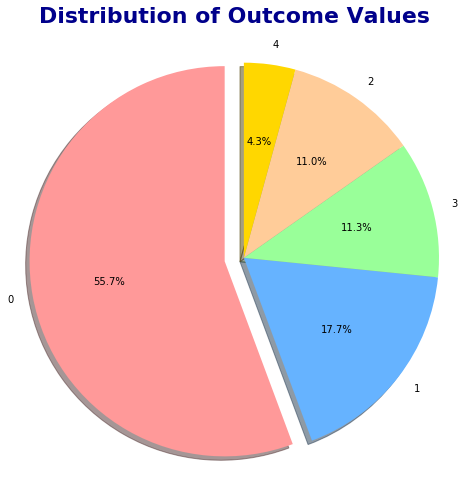

In [10]:
# visualizing the percentage distribution of the outcome values in the form of a pie chart

# create
plt.figure(figsize=(8, 8))

plt.pie(
    data['num'].value_counts(),
    labels=data['num'].value_counts().index,
    autopct='%1.1f%%',
    colors=['#FF9999', '#66B3FF', '#99FF99', '#FFCC99', '#FFD700'],
    startangle=90,  # Start the pie chart from the top
    shadow=True,  # Add shadow for depth
    explode=(0.1, 0, 0, 0, 0)  # Slightly explode the first slice for emphasis
)

# set title
plt.title('Distribution of Outcome Values', fontsize=22, fontweight='bold', color='darkblue', pad=20)

# equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')
plt.show()

The classification of the attributes:

#### Nominal:

1. sex (#4): Represents categories (1 = male; 0 = female) without a meaningful order.
2. cp (#9): Chest pain type is categorical without intrinsic ranking (typical angina, atypical angina, etc.).
3. restecg (#19): Electrocardiographic results (0 = normal, 1 = ST-T wave abnormality, 2 = left ventricular hypertrophy) without inherent ranking.
4. thal (#51): Represents categories of thalassemia (3 = normal; 6 = fixed defect; 7 = reversible defect) without ranking.
5. fbs (#16): While it indicates a binary condition (fasting blood sugar > 120 mg/dL), it is nominal as it doesn’t imply a rank (1 = true; 0 = false).
6. exang (#38): Indicates the presence of exercise-induced angina (1 = yes; 0 = no) without ranking.

#### Ordinal:

1. slope (#41): Indicates the slope of the peak exercise ST segment, where higher values indicate better outcomes (1 = upsloping; 2 = flat; 3 = downsloping).
2. ca (#44): Number of major vessels (0-3) can imply a level of risk associated with heart disease and has an implicit order.
3. num (#58): Diagnosis of heart disease has an inherent ranking based on the severity of narrowing (0 = <50%; 1 = >50%).

#### Interval:

None: This dataset does not contain attributes that fit the interval definition (no true zero).

#### Ratio:

1. age (#3): Continuous measurement with a true zero, indicating the absence of age.
2. trestbps (#10): Blood pressure is a continuous variable with a true zero.
3. chol (#12): Cholesterol levels are continuous with a true zero.
4. thalach (#32): Maximum heart rate is continuous with a true zero.
5. oldpeak (#40): Represents ST depression and has a true zero indicating no depression.

***
## Section: 2.2 - Revise the dataset
- Review the meanings of the attributes and consider removing redundant or (likely) irrelevant attributes, combining attributes, etc., to reduce the number of attributes.
- (You may choose to use techniques such as those you used in Homework 1 to analyze the impacts of individual attributes on the CLASS attribute, but you need not do a “deep” analysis.)
- Describe what you chose to do (and not do), and why.
***

#### Meaning of the attributes 

1. age: Age of the patient
2. sex: Sex of the patient (1 = male; 0 = female)
3. cp: Chest pain type (0-3)
4. trestbps: Resting blood pressure (in mm Hg)
5. chol: Serum cholesterol in mg/dl
6. fbs: Fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
7. restecg: Resting electrocardiographic results (0-2)
8. thalach: Maximum heart rate achieved
9. exang: Exercise induced angina (1 = yes; 0 = no)
10. oldpeak: ST depression induced by exercise relative to rest
11. slope: Slope of the peak exercise ST segment (0-2)
12. ca: Number of major vessels (0-3) colored by fluoroscopy
13. thal: Thalassemia (1 = normal; 2 = fixed defect; 3 = reversible defect)
14. num: Diagnosis of heart disease (0-4)

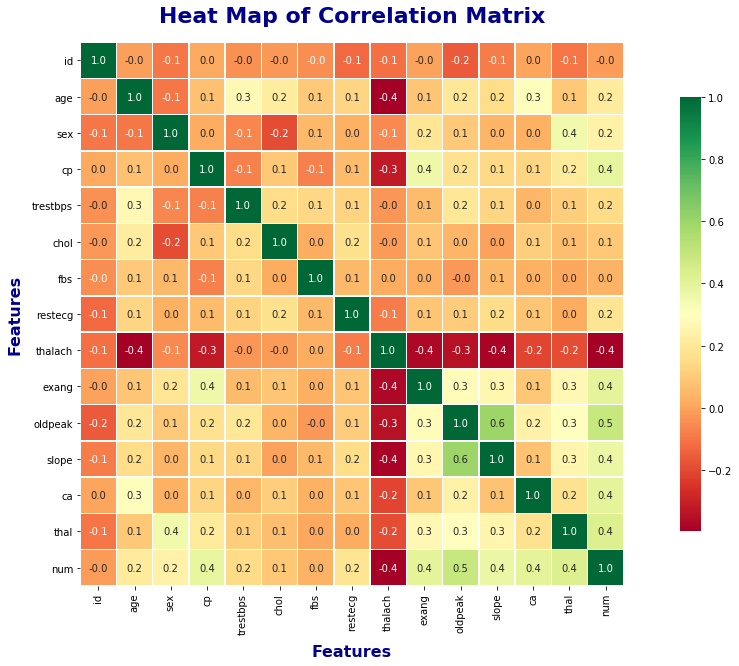

In [11]:
# exploring the strength of relationship between features with help of correlation matrix
# then created a heatmap using Seaborn to visually represent these correlations, 
# making it easier to spot strong and weak relationships


# Calculate the correlation matrix of the dataset
corr_matrix = data.corr()


# Create a heatmap to visualize the correlations
f, ax = plt.subplots(figsize=(20, 10))

sns.heatmap(
    corr_matrix, 
    annot=True, 
    linewidths=0.5, 
    cmap='RdYlGn', 
    fmt='.1f', 
    ax=ax,
    cbar_kws={"shrink": .8},         # customize color bar size
    square=True,                     # Make the cells square-shaped
    xticklabels=corr_matrix.columns, 
    yticklabels=corr_matrix.index    
)

# Set the title
plt.title('Heat Map of Correlation Matrix', fontsize=22, fontweight='bold', color='darkblue', pad=20)
plt.xlabel('Features', fontsize=16, fontweight='bold', color='darkblue', labelpad=10)
plt.ylabel('Features', fontsize=16, fontweight='bold', color='darkblue', labelpad=10)

# Display
plt.show()

# This analysis helps identify potentially redundant features and informs decisions on feature selection done in further steps.

In [12]:
# A threshold of 0.1 is set to identify weak correlations with the 'num' attribute. 
# This value helps pinpoint features that have minimal influence on heart disease diagnosis, 
# allowing for their removal to streamline analysis and enhance model performance.

low_correlation_threshold = 0.1
low_correlation_attributes = corr_matrix['num'][abs(corr_matrix['num']) < low_correlation_threshold].index.tolist()
low_correlation_attributes

['id', 'chol', 'fbs']

In [13]:
# Dropping attributes with low correlation to streamline the dataset for better analysis.
data = data.drop(columns=low_correlation_attributes)

In [14]:
# remaining columns after removing low-correlation features.
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'restecg', 'thalach', 'exang',
       'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

In [15]:
# Create a new feature 'st_depression_index' by adding 'slope' and 'oldpeak'.
# This combination is chosen because both features are highly correlated (0.6), indicating a strong relationship in their impact on heart health.
# 'slope' reflects the direction of the ST segment during peak exercise, while 'oldpeak' shows ST segment depression during exercise compared to rest.
# Combining these two metrics captures a more comprehensive view of the heart's response to stress, enhancing the predictive power for heart disease.

data['st_depression_index'] = data['slope'] + data['oldpeak']
data.drop(columns=['slope', 'oldpeak'], inplace=True)

In [16]:
# display the updated columns after modifications.
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'restecg', 'thalach', 'exang', 'ca',
       'thal', 'num', 'st_depression_index'],
      dtype='object')

In [17]:
# shape of the dataset, indicating the number of rows and columns after changes
data.shape

(282, 11)

***
## Section: 2.3 - Transform the attributes
- Consider transforming the remaining attributes (e.g., using the data dictionary to replace the numbers with text values for some attributes – this might or might not be useful), normalizing / scaling values, encoding labels (if necessary), etc.
- Describe what you chose to do (and not do), and why.
***

1. **Replacing with Text Values:** For attributes like 'sex' (1 = male; 0 = female), 'fbs' (1 = true; 0 = false), and 'exang' (1 = yes; 0 = no), replacing numeric codes with text values can improve interpretability. However, this step was not taken in this case to maintain the numerical format, which is often easier for model algorithms to process.

2. **Normalization/Scaling Values:** Normalizing or scaling was considered to ensure all features contribute equally to the model's performance. This was essential since attributes are measured on different scales. Standard scaling is applied to bring all values to a similar range, enhancing model accuracy and convergence speed.

3. **Encoding Labels:** It converts categorical into numerical values, which helps algorithms understand the data better. It's important for variables that are nominal. Since many attributes were already in numeric form, this step was not taken.

Steps like one-hot encoding were not implemented for categorical variables due to the potential increase in dimensionality, which could complicate the model without significantly improving performance in this case.

Finally, only **Standard Scaling** was prioritized to improve the model's effectiveness by ensuring that all features are on a similar scale, which can lead to better performance in many algorithms.

In [18]:
# Separate features (x) from target variable (y)
x = data.drop(columns=['num'])  # 'num' is the target column
y = data['num']

# Split the data into training (80%) and testing (20%) sets
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.33, random_state=42)

# Scale the features to improve model performance
scaler = StandardScaler()
xtrnscaled = scaler.fit_transform(xtrain)  # Fit and transform the training data
xtstscaled = scaler.transform(xtest)        # Transform the testing data

***
# Section: 3 - Evaluation of the Off-The-Shelf KNN Classifier
- Select the KNN classifier from the SciKit Learn library and run it on the dataset.
***

***
## Section: 3.1 - Configure the off-the-shelf KNN classifier
- Use the KNeighborsClassifier from the SciKit Learn library
- Explain all setup, parameters and execution options you chose to set, and why.
***

In [19]:
# Initialize the KNN classifier
# n_neighbors is set to 5, which is a common default choice for the number of neighbors to consider for voting.
# The metric is set to 'euclidean' to calculate the distance between data points, which is a standard choice for KNN.
# weights are set to 'uniform' to give equal weight to all neighbors.

knn = KNeighborsClassifier(
    n_neighbors=5, 
    metric='euclidean', 
    weights='uniform'
)

In [20]:
# fitting the KNN model to the training data
# This trains the model to understand the data patterns.

knn.fit(xtrnscaled, ytrain)  # Using scaled training data and target variable

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

***
## Section: 3.2 - Run and evaluate the classifier
- Try several values of the K parameter and compare the results.
- Evaluate the performance of the classifier, using the evaluation method you defined above.
***

In [21]:
# K values to try (1-20)
neighbors = range(1, 21)
results_accuracy = {}   # storing accuracy for each K value
results_cost = {}       # storing cost for each K value

# Loop through each K value to train and evaluate the model
for k in neighbors:
    knn.set_params(n_neighbors=k)                   # updating neighbors value
    knn.fit(xtrnscaled, ytrain)                     # fitting the model on the training data    
    ypred = knn.predict(xtstscaled)                 # predicting the labels for the test set
    accuracy = accuracy_score(ytest, ypred)         # calculating accuracy score
    print(f"K={k}: Accuracy={accuracy*100:.2f}")    # printing accuracy
    results_accuracy[k] = accuracy                  # storing the accuracy in the results dictionary
    cm = evaluate_classification_metrics(ytest, ypred) # calculating traditional metrics 
    cost = total_cost(cm)                           # calculating cost
    results_cost[k] = cost                          # storing the cost in the results dictionary
    print("_____________________________________________________________________________________\n")

K=1: Accuracy=54.26
Confusion Matrix:
 [[40  5  4  2  1]
 [ 7  5  3  1  0]
 [ 2  1  3  1  0]
 [ 4  3  3  2  2]
 [ 1  0  0  3  1]]
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.77      0.75        52
           1       0.36      0.31      0.33        16
           2       0.23      0.43      0.30         7
           3       0.22      0.14      0.17        14
           4       0.25      0.20      0.22         5

    accuracy                           0.54        94
   macro avg       0.36      0.37      0.36        94
weighted avg       0.53      0.54      0.53        94

Total Cost: 18600
Total Benefit: 36000
Net Benefit: 17400
_____________________________________________________________________________________

K=2: Accuracy=56.38
Confusion Matrix:
 [[45  5  2  0  0]
 [ 7  6  2  1  0]
 [ 3  2  2  0  0]
 [ 6  5  2  0  1]
 [ 1  3  1  0  0]]
Classification Report:
               precision    recall  f1-score   support

   

Best K (accuracy): 14, Accuracy: 61.70%, Cost: 15900.00


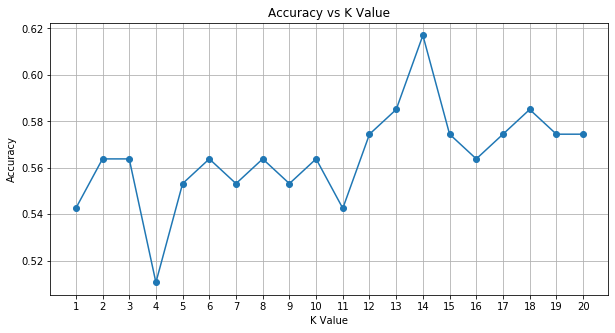

Best K (cost): 1, Cost: 17400.00, Accuracy: 54.26%


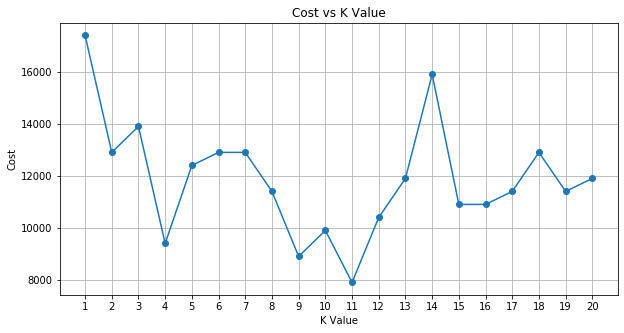

In [22]:
# evaluates the performance of a K-Nearest Neighbors (KNN) model by testing various values of K (from 1 to 20).

# Print the contents of the dictionaries
# print("Accuracy Results:", results_accuracy)
# print("Cost Results:", results_cost)

# Evaluate best K based on accuracy
best_k_accuracy = max(results_accuracy, key=results_accuracy.get)
best_accuracy = results_accuracy.get(best_k_accuracy)
best_cost_accuracy = results_cost.get(best_k_accuracy)

# If both accuracy and cost for the best K are available, print them
if best_accuracy is not None and best_cost_accuracy is not None:
    print(f"Best K (accuracy): {best_k_accuracy}, Accuracy: {best_accuracy*100:.2f}%, Cost: {best_cost_accuracy:.2f}")    
    
# Plotting Accuracy vs K
plt.figure(figsize=(10, 5))
plt.plot(neighbors, list(results_accuracy.values()), marker='o')
plt.title('Accuracy vs K Value')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.xticks(neighbors)
plt.grid()
plt.show()

# Evaluate best K based on cost
best_k_cost = max(results_cost, key=results_cost.get)
best_cost = results_cost.get(best_k_cost)
best_accuracy_cost = results_accuracy.get(best_k_cost)

# If both cost and accuracy for the best K (by cost) are available, print them
if best_cost is not None and best_accuracy_cost is not None:
    print(f"Best K (cost): {best_k_cost}, Cost: {best_cost:.2f}, Accuracy: {best_accuracy_cost*100:.2f}%")
    
# Plotting Cost vs K
plt.figure(figsize=(10, 5))
plt.plot(neighbors, list(results_cost.values()), marker='o')
plt.title('Cost vs K Value')
plt.xlabel('K Value')
plt.ylabel('Cost')
plt.xticks(neighbors)
plt.grid()
plt.show()

# Accuracy Output:
# The model's accuracy across K values ranged from 54.3% to 61.7%.
# The highest accuracy of 61.7% was achieved with K=14, 
# meaning that the model correctly identified conditions in about 61.7% of cases

# Benefit-Cost Results:
# K=1 has the highest cost at 17,400, meaning it leads to more misdiagnoses and incorrect treatments.

# From a patient safety perspective, K=14 should be prioritized 
# because it reduces the risk of harmful misdiagnoses, even though its accuracy is not perfect.

***
## Section: 3.3 - Evaluate the choice of the KNN classifier
- What characteristics of the problem and data made KNN a good or bad choice?
***

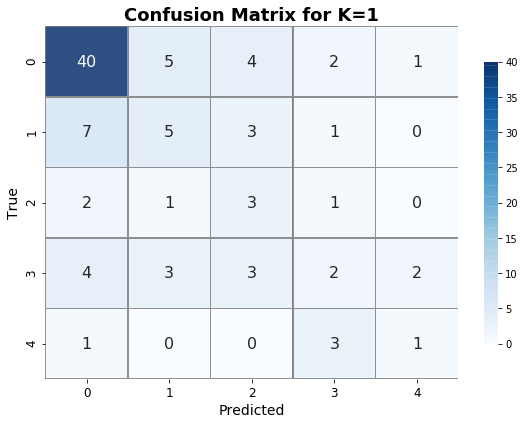

In [23]:
# Set the KNN model to use the best K based on cost
knn.set_params(n_neighbors=best_k_cost)
knn.fit(xtrnscaled, ytrain)           # Fit the model using the scaled training data
ypred_best = knn.predict(xtstscaled)  # Make predictions on the scaled test data

# Confusion Matrix
cm_best = confusion_matrix(ytest, ypred_best)
# print(f"Best K: {best_k}, Accuracy: {best_accuracy*100:.2f}%, Cost: {best_cost:.2f}")
# print("Confusion Matrix:")
# print(cm_best)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))

# Create heapmap
sns.heatmap(cm_best, annot=True, fmt='d', cmap='Blues', 
            xticklabels=np.unique(ytest), yticklabels=np.unique(ytest), 
            cbar_kws={"shrink": 0.8},
            linewidths=.5, 
            linecolor='grey', 
            alpha=0.85,
            annot_kws={"size": 16}
           ) 

plt.title(f'Confusion Matrix for K={best_k_cost}', fontsize=18, weight='bold')
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('True', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Display
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()

# Class 0 has the highest number of correct predictions (40), indicating that the model performs well for this class.
# Classes 1 to 4 have significantly fewer correct predictions, 
# suggesting that the model may struggle with these classes, especially class 3, which has least correct prediction.
# The presence of false positives and false negatives highlights areas for improvement in the model, 
# indicating potential confusion between certain classes.

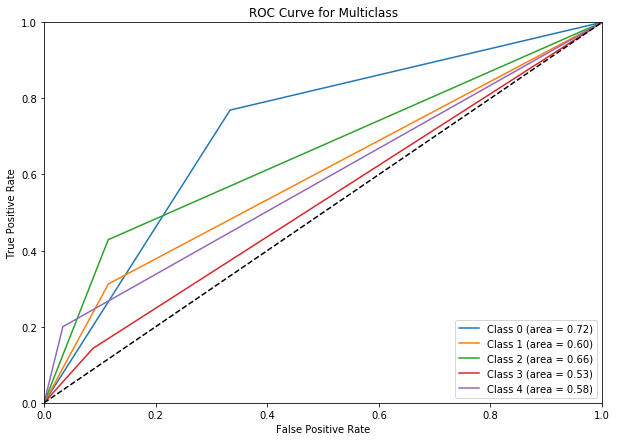

In [24]:
# Implementing ROC Curve for Multiclass
y_prob = knn.predict_proba(xtstscaled)
n_classes = len(np.unique(ytest))

# Binarizing the output to facilitate the calculation of the ROC curve for each class. 
y_test_binarized = label_binarize(ytest, classes=np.unique(ytest))

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

# The area under the ROC curve (AUC) is calculated for each class
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# The ROC curves for all classes are plotted on the same graph
plt.figure(figsize=(10, 7))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multiclass')
plt.legend(loc='lower right')
plt.show()


# The ROC curves for each class display the trade-off between the true positive rate (sensitivity) and 
# the false positive rate (1-specificity). Each curve represents the model's ability to distinguish 
# between a specific class and the rest:

# The highest AUC is for Class 0 at 0.72, indicating it has the best predictive ability among the classes. 
# This suggests that the model effectively distinguishes Class 0, while lower AUC values for other classes may 
# signal classification challenges. Overall, the plot facilitates easy comparison of performance across classes, 
# highlighting strengths and areas for improvement.

KNN’s suitability is influenced by several characteristics of dataset and problem:

#### Positive Aspects:
1. **Dataset Size**: KNN is computationally expensive for large datasets but works well with smaller datasets like this one, allowing for feasible runtime and training without excessive delays.
2. **Intuitive Classification**: Since the problem involves classifying medical conditions, this algorithm predicts outcomes based on the nearest neighbors, aligns with the idea of similar patients having similar diagnoses.

#### Negative Aspects:
1. **Imbalanced Classes**: KNN struggles with underrepresented medical conditions, leading to poor accuracy for minority classes as majority cases dominate predictions.
2. **Noisy Features**: Symptoms common across multiple conditions make KNN less effective, resulting in moderate accuracy (54-61%).
3. **High Misclassification Costs**: Misdiagnosing patients can be costly, and KNN, sensitive to local data variations, may not handle these risks as well as other models.

In summary, KNN’s performance is limited by data imbalance and feature noise, making it less ideal despite being computationally feasible for moderate datasets.

***
# Section: 4 - Evaluation of Off-The-Shelf Classifier #2
- As with the KNN classifier above, choose another classifier from the SciKit Learn library (Decision Tree, SVM, Logistic Regression, etc.) and run it on the dataset.
***

***
## Section: 4.1 - Configure the classifier
- Use the appropriate classifier from the SciKit Learn library.
- Explain all setup, parameters and execution options you chose to set, and why.
***

In [25]:
# Define the hyperparameter grid for Random Forest
rf_grid = {
    "n_estimators": np.arange(100, 1000, 250),
    "max_depth": [None, 3, 5],
    "min_samples_split": [5, 10, 15]
}
# n_estimators - This parameter determines the number of trees in the forest. 
# Starting from 100 and going up to 1000 in increments of 250 allows for a balance between model accuracy 
# and computational efficiency, as more trees generally lead to better performance.

# This parameter sets the maximum depth of the trees. 
# None allows the trees to expand until all leaves are pure. 
# The values 3 and 5 help in controlling overfitting by limiting the depth of the trees, thus promoting generalization.

# This parameter specifies the minimum number of samples required to split an internal node. 
# The values 5, 10, and 15 help manage tree growth and prevent overfitting by ensuring splits only occur when there are 
# sufficient samples present.

# Initialize the Random Forest Classifier
clf = RandomForestClassifier()

# Setup random hyperparameter search for RandomForestClassifier 
# rf_clf = RandomizedSearchCV(RandomForestClassifier(),
#                           param_distributions=rf_grid,
#                           cv=5,
#                           n_iter=20,
#                           verbose=True,
#                           random_state=42)
# parameter grid is designed for systematic exploration of different hyperparameter combinations in the Random Forest model.

***
## Section: 4.2 - Run and evaluate the classifier
- Try several values of the parameters (if appropriate) and compare the results.
- Evaluate the performance of the classifier, using the evaluation method you defined above.
***

In [26]:
# Looping through all specified hyperparameters in rf_grid
# Printing the accuracy and cost for each hyperparameter configuration.

results_accuracy = {}   # Storing accuracy for each hyperparameter configuration
results_cost = {}       # Storing cost for each hyperparameter configuration
trnscore = []           # List to store training scores
tstscore = []           # List to store test scores

for n_estimators in rf_grid["n_estimators"]:
    for max_depth in rf_grid["max_depth"]:
        for min_samples_split in rf_grid["min_samples_split"]:
            rf = RandomForestClassifier(
                n_estimators=n_estimators,
                max_depth=max_depth,
                min_samples_split=min_samples_split,
                random_state=42 # Set a random state for reproducibility
            )                                                      # Initialize with current hyperparameters
            
            rf.fit(xtrnscaled, ytrain)                             # Fit the model on the training data    
            ypred = rf.predict(xtstscaled)                         # Predicting the labels for the test set
            trnscore.append(rf.score(xtrnscaled, ytrain))         # Update training scores    
            tstscore.append(rf.score(xtstscaled, ytest))          # Update test scores
            
            accuracy = accuracy_score(ytest, ypred)               # Calculate accuracy score
            
            print(f"n_estimators={n_estimators}, max_depth={max_depth}, min_samples_split={min_samples_split}:")
            print(f"Accuracy={accuracy*100:.2f}%")  # Print accuracy
            
            # Store the accuracy in the results dictionary
            results_accuracy[(n_estimators, max_depth, min_samples_split)] = accuracy  
            
            cm = evaluate_classification_metrics(ytest, ypred)     # Calculate traditional metrics 
            cost = total_cost(cm)                                   # Calculate cost
            
            # Store the cost in the results dictionary
            results_cost[(n_estimators, max_depth, min_samples_split)] = cost  
            
            print("_____________________________________________________________________________________\n")

n_estimators=100, max_depth=None, min_samples_split=5:
Accuracy=59.57%
Confusion Matrix:
 [[50  0  2  0  0]
 [ 9  3  2  2  0]
 [ 1  4  0  2  0]
 [ 4  3  4  2  1]
 [ 2  1  0  1  1]]
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.96      0.85        52
           1       0.27      0.19      0.22        16
           2       0.00      0.00      0.00         7
           3       0.29      0.14      0.19        14
           4       0.50      0.20      0.29         5

    accuracy                           0.60        94
   macro avg       0.36      0.30      0.31        94
weighted avg       0.53      0.60      0.55        94

Total Cost: 18600
Total Benefit: 34500
Net Benefit: 15900
_____________________________________________________________________________________

n_estimators=100, max_depth=None, min_samples_split=10:
Accuracy=60.64%
Confusion Matrix:
 [[50  1  1  0  0]
 [ 8  3  4  1  0]
 [ 1  3  1  2  0]
 [ 3  5  4  2  0

Best Hyperparameters (accuracy): n_estimators=350, max_depth=5, min_samples_split=10
Accuracy: 63.83%, Cost: 20900.00


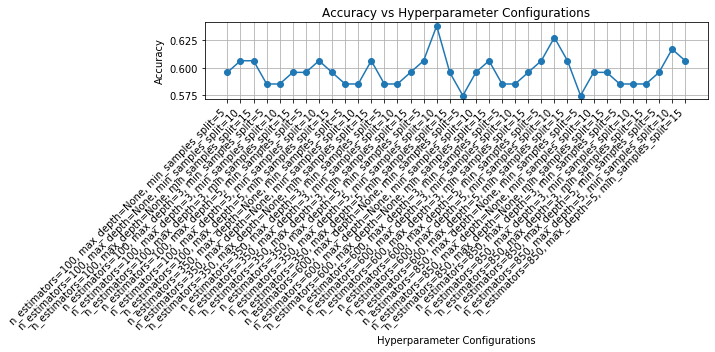

Best Hyperparameters (cost): n_estimators=350, max_depth=5, min_samples_split=10
Cost: 20900.00, Accuracy: 63.83%


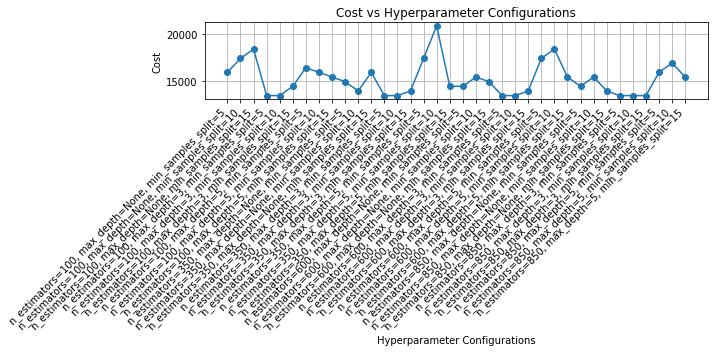

In [27]:
# Evaluate best hyperparameter configuration based on accuracy
best_config_accuracy = max(results_accuracy, key=results_accuracy.get)
best_accuracy = results_accuracy.get(best_config_accuracy)
best_cost_accuracy = results_cost.get(best_config_accuracy)

# If both accuracy and cost for the best configuration are available, print them
if best_accuracy is not None and best_cost_accuracy is not None:
    print(f"Best Hyperparameters (accuracy): n_estimators={best_config_accuracy[0]}, max_depth={best_config_accuracy[1]}, min_samples_split={best_config_accuracy[2]}")
    print(f"Accuracy: {best_accuracy*100:.2f}%, Cost: {best_cost_accuracy:.2f}")    

# Plotting Accuracy vs Hyperparameter Configurations
plt.figure(figsize=(10, 5))
plt.plot([i for i in range(len(results_accuracy))], list(results_accuracy.values()), marker='o')
plt.title('Accuracy vs Hyperparameter Configurations')
plt.xlabel('Hyperparameter Configurations')
plt.ylabel('Accuracy')
plt.xticks(range(len(results_accuracy)), [f"n_estimators={k[0]}, max_depth={k[1]}, min_samples_split={k[2]}" for k in results_accuracy.keys()], rotation=45, ha='right')
plt.grid()
plt.tight_layout()
plt.show()

# Evaluate best hyperparameter configuration based on cost
best_config_cost = max(results_cost, key=results_cost.get)  # Using max since higher cost is better
best_cost = results_cost.get(best_config_cost)
best_accuracy_cost = results_accuracy.get(best_config_cost)

# If both cost and accuracy for the best configuration (by cost) are available, print them
if best_cost is not None and best_accuracy_cost is not None:
    print(f"Best Hyperparameters (cost): n_estimators={best_config_cost[0]}, max_depth={best_config_cost[1]}, min_samples_split={best_config_cost[2]}")
    print(f"Cost: {best_cost:.2f}, Accuracy: {best_accuracy_cost*100:.2f}%")

# Plotting Cost vs Hyperparameter Configurations
plt.figure(figsize=(10, 5))
plt.plot([i for i in range(len(results_cost))], list(results_cost.values()), marker='o')
plt.title('Cost vs Hyperparameter Configurations')
plt.xlabel('Hyperparameter Configurations')
plt.ylabel('Cost')
plt.xticks(range(len(results_cost)), [f"n_estimators={k[0]}, max_depth={k[1]}, min_samples_split={k[2]}" for k in results_cost.keys()], rotation=45, ha='right')
plt.grid()
plt.tight_layout()
plt.show()

# findings:
# The Random Forest model best accuracy and cost-matrix demonstrated a solid predictive performance with an accuracy of 63.83% 
# and a benefit score of 20,900, indicating a reliable understanding of the data. 

# This result of highest predictive performance with highest cost-benefit considerations is crucial in healthcare, 
# where efficient use of resources significantly impact patient outcomes and overall system effectiveness.

***
## Section: 4.3 - Evaluate the choice of the classifier
- What characteristics of the problem and data made the classifier a good or bad choice?
***

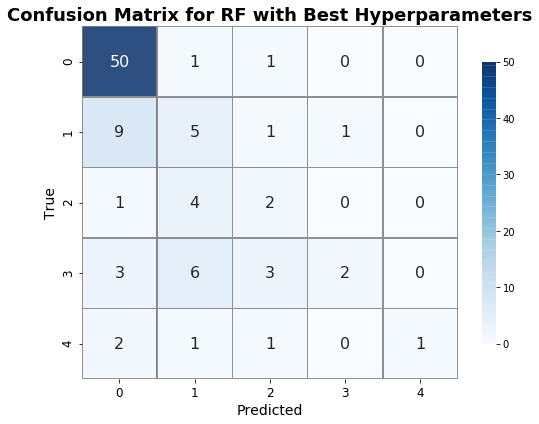

In [28]:
# The confusion matrix is computed to evaluate the model's performance.
# A heatmap is generated for the confusion matrix to visualize the prediction results.


# Set the Random Forest model to use the best hyperparameter configuration based on cost
best_rf_params = best_config_cost  # This is a tuple: (n_estimators, max_depth, min_samples_split)

rf_best = RandomForestClassifier(
    n_estimators=best_rf_params[0],
    max_depth=best_rf_params[1],
    min_samples_split=best_rf_params[2],
    random_state=42  # Ensure reproducibility
)

rf_best.fit(xtrnscaled, ytrain)           # Fit the model using the scaled training data
ypred_best_rf = rf_best.predict(xtstscaled)  # Make predictions on the scaled test data

# Confusion Matrix
cm_best_rf = confusion_matrix(ytest, ypred_best_rf)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))

# Create heatmap
sns.heatmap(cm_best_rf, annot=True, fmt='d', cmap='Blues', 
            xticklabels=np.unique(ytest), yticklabels=np.unique(ytest), 
            cbar_kws={"shrink": 0.8},
            linewidths=.5, 
            linecolor='grey', 
            alpha=0.85,
            annot_kws={"size": 16}
           ) 

plt.title(f'Confusion Matrix for RF with Best Hyperparameters', fontsize=18, weight='bold')
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('True', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Display
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()

# The high accuracy for Class 0 is promising, but the low performance for Classes 1, 2, 3, and 4 raises concerns about 
# the model's robustness. In a medical setting, misclassification, especially for critical conditions, could have serious 
# implications for patient management. Therefore, further tuning, data augmentation, or even considering alternative 
# modeling approaches might be necessary to enhance the model's overall effectiveness and ensure it meets clinical 
# requirements.

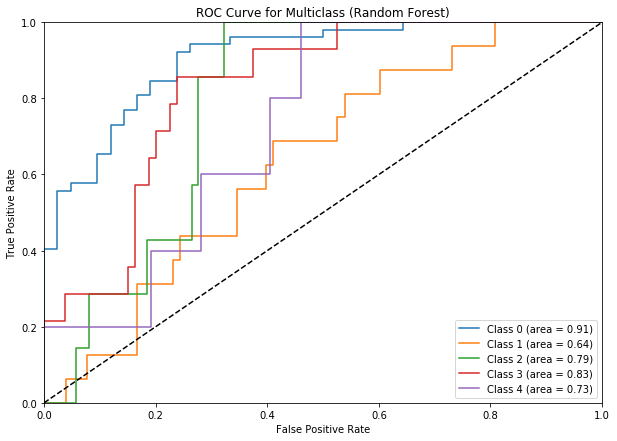

In [29]:
# Calculate the false positive rates (FPR) and true positive rates (TPR) for each class, and compute the AUC
# The plot will show how well the Random Forest model can distinguish between each class.

# Get predicted probabilities for each class using the Random Forest model
y_prob_rf = rf_best.predict_proba(xtstscaled)
n_classes = len(np.unique(ytest))

# Binarize the output to facilitate the calculation of the ROC curve for each class.
y_test_binarized_rf = label_binarize(ytest, classes=np.unique(ytest))

# Compute ROC curve and ROC area for each class
fpr_rf = dict()
tpr_rf = dict()
roc_auc_rf = dict()

# The area under the ROC curve (AUC) is calculated for each class
for i in range(n_classes):
    fpr_rf[i], tpr_rf[i], _ = roc_curve(y_test_binarized_rf[:, i], y_prob_rf[:, i])
    roc_auc_rf[i] = auc(fpr_rf[i], tpr_rf[i])

# The ROC curves for all classes are plotted on the same graph
plt.figure(figsize=(10, 7))
for i in range(n_classes):
    plt.plot(fpr_rf[i], tpr_rf[i], label=f'Class {i} (area = {roc_auc_rf[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multiclass (Random Forest)')
plt.legend(loc='lower right')
plt.show()

# The ROC curves for each class display the trade-off between the true positive rate (sensitivity) and 
# the false positive rate (1-specificity). Each curve represents the model's ability to distinguish 
# between a specific class and the rest:

# Interpretation of results
# Class 0: AUC = 0.90: This high value indicates excellent discrimination, meaning the model is highly effective at 
# correctly identifying instances of Class 0 compared to others. 
# Class 1 and Class 4, indicats a need for further refinement to enhance clinical decision-making reliability

Random Forest's effectiveness for this medical classification task is shaped by several problem and data characteristics:

#### Positive Aspects:
1. **Handling Complexity:** Random Forest excels in capturing intricate relationships within complex datasets, which is essential for medical conditions that often have non-linear interactions.

#### Negative Aspects:
1. **Class Imbalance:** With a few classes being underrepresented, Random Forest may underperform, leading to skewed accuracy and a tendency to misclassify rare conditions.
2. **Overfitting Risks:** While it can handle noise, the potential for overfitting to specific patterns in the training data can lead to poor generalization on unseen cases.
3. **Cost Sensitivity:** Given the serious implications of misdiagnosis in healthcare, Random Forest's relatively high cost of misclassification can be a concern.

In summary, while Random Forest benefits from its complexity handling, class imbalance and overfitting pose significant challenges in a medical context.

***
# Section: 5 - Evaluation of Off-The-Shelf Classifier #3
- As with the KNN classifier above, choose another classifier from the SciKit Learn library (Decision Tree, SVM, Logistic Regression, etc.) and run it on the dataset.
***

***
## Section: 5.1 - Configure the classifier
- Use the appropriate classifier from the SciKit Learn library.
- Explain all setup, parameters and execution options you chose to set, and why.
***

In [30]:
# Different hyperparameters for our LogisticRegression model
params = {
    'penalty' : ['l2', 'elasticnet'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs', 'sag','saga'],
    'max_iter' : [100, 1000, 2500, 5000],
    }

# penalty controls regularization: 
# 'l2' reduces complexity and handles multicollinearity, 
# while 'elasticnet' combines L1 and L2 for feature selection and better performance.

# C is the inverse of regularization strength; smaller values mean stronger regularization 
# to avoid overfitting, which is crucial in medical predictions.

# solver determines the optimization method: 
# 'lbfgs' is efficient for small datasets, 
# 'sag' is faster for large datasets, 
# and 'saga' supports both L1 and L2, ideal for elastic net.

# max_iter sets the max iterations for training, ensuring thorough optimization for reliable predictions.

# Instantiate a multinomial logistic regression model for multi-class classification
m = LogisticRegression(multi_class='multinomial')

***
## Section: 5.2 - Run and evaluate the classifier
- Try several values of the parameters (if appropriate) and compare the results.
- Evaluate the performance of the classifier, using the evaluation method you defined above.
***

In [31]:
# Looping through all specified hyperparameters in params
# Printing the accuracy and cost for each hyperparameter configuration.

results_accuracy = {}  # To store accuracy for each combination
results_cost = {}      # To store cost for each combination

# Iterate through each combination of hyperparameters
for penalty in params['penalty']:
    for C in params['C']:
        for solver in params['solver']:
            for max_iter in params['max_iter']:
                try:
                    # Create a Logistic Regression model with the current hyperparameters
                    lr_model = LogisticRegression(penalty=penalty, C=C, solver=solver, max_iter=max_iter, multi_class='multinomial')

                    # Fit the model on the training data
                    lr_model.fit(xtrnscaled, ytrain)

                    # Make predictions on the test set
                    ypred = lr_model.predict(xtstscaled)

                    # Calculate accuracy and cost
                    accuracy = accuracy_score(ytest, ypred)
                    cm = evaluate_classification_metrics(ytest, ypred)  # Assuming this function is defined
                    cost = total_cost(cm)                                  # Assuming this function is defined

                    # Store the results
                    results_accuracy[(penalty, C, solver, max_iter)] = accuracy
                    results_cost[(penalty, C, solver, max_iter)] = cost
                    
                    # Print results for the current combination
                    print(f"Penalty: {penalty}, C: {C:.4f}, Solver: {solver}, Max Iter: {max_iter} => Accuracy: {accuracy*100:.2f}%, Cost: {cost:.2f}")

                except Exception as e:
                    print(f"Error with parameters: Penalty={penalty}, C={C:.4f}, Solver={solver}, Max Iter={max_iter}. Error: {e}")

Confusion Matrix:
 [[52  0  0  0  0]
 [16  0  0  0  0]
 [ 7  0  0  0  0]
 [14  0  0  0  0]
 [ 5  0  0  0  0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.55      1.00      0.71        52
           1       0.00      0.00      0.00        16
           2       0.00      0.00      0.00         7
           3       0.00      0.00      0.00        14
           4       0.00      0.00      0.00         5

    accuracy                           0.55        94
   macro avg       0.11      0.20      0.14        94
weighted avg       0.31      0.55      0.39        94

Total Cost: 18600
Total Benefit: 26000
Net Benefit: 7400
Penalty: l2, C: 0.0001, Solver: lbfgs, Max Iter: 100 => Accuracy: 55.32%, Cost: 7400.00
Confusion Matrix:
 [[52  0  0  0  0]
 [16  0  0  0  0]
 [ 7  0  0  0  0]
 [14  0  0  0  0]
 [ 5  0  0  0  0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.55      1.00      0.71

Best Hyperparameters (accuracy): Penalty=l2, C=0.0127, Solver=lbfgs, Max Iter=100
Accuracy: 59.57%, Cost: 11900.00


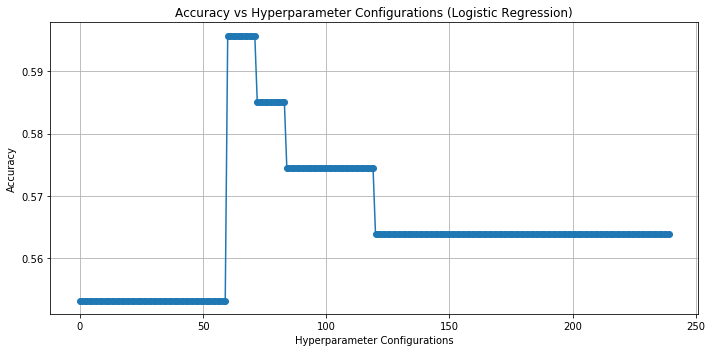

Best Hyperparameters (cost): Penalty=l2, C=0.0886, Solver=lbfgs, Max Iter=100
Cost: 13400.00, Accuracy: 57.45%


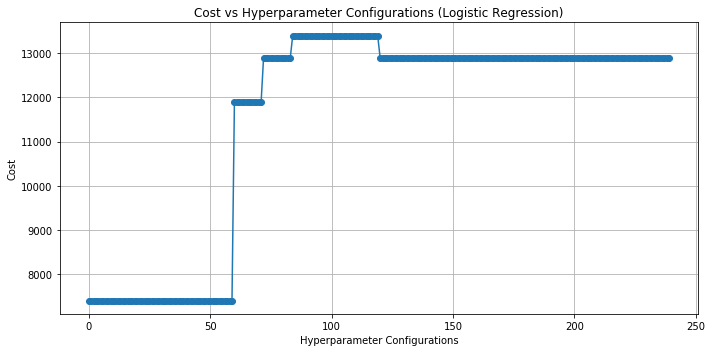

In [35]:
# Evaluate best hyperparameter configuration based on accuracy
best_config_accuracy_lr = max(results_accuracy, key=results_accuracy.get)
best_accuracy_lr = results_accuracy.get(best_config_accuracy_lr)
best_cost_accuracy_lr = results_cost.get(best_config_accuracy_lr)

# If both accuracy and cost for the best configuration are available, print them
if best_accuracy_lr is not None and best_cost_accuracy_lr is not None:
    print(f"Best Hyperparameters (accuracy): Penalty={best_config_accuracy_lr[0]}, C={best_config_accuracy_lr[1]:.4f}, Solver={best_config_accuracy_lr[2]}, Max Iter={best_config_accuracy_lr[3]}")
    print(f"Accuracy: {best_accuracy_lr*100:.2f}%, Cost: {best_cost_accuracy_lr:.2f}")    

# Plotting Accuracy vs Hyperparameter Configurations
plt.figure(figsize=(10, 5))
plt.plot([i for i in range(len(results_accuracy))], list(results_accuracy.values()), marker='o')
plt.title('Accuracy vs Hyperparameter Configurations (Logistic Regression)')
plt.xlabel('Hyperparameter Configurations')
plt.ylabel('Accuracy')
# plt.xticks(range(len(results_accuracy)), [f"Penalty={k[0]}, C={k[1]:.4f}, Solver={k[2]}, Max Iter={k[3]}" for k in results_accuracy.keys()], rotation=45, ha='right')
plt.grid()
plt.tight_layout()
plt.show()

# Evaluate best hyperparameter configuration based on cost
best_config_cost_lr = max(results_cost, key=results_cost.get)  # Using max since higher cost is better
best_cost_lr = results_cost.get(best_config_cost_lr)
best_accuracy_cost_lr = results_accuracy.get(best_config_cost_lr)

# If both cost and accuracy for the best configuration (by cost) are available, print them
if best_cost_lr is not None and best_accuracy_cost_lr is not None:
    print(f"Best Hyperparameters (cost): Penalty={best_config_cost_lr[0]}, C={best_config_cost_lr[1]:.4f}, Solver={best_config_cost_lr[2]}, Max Iter={best_config_cost_lr[3]}")
    print(f"Cost: {best_cost_lr:.2f}, Accuracy: {best_accuracy_cost_lr*100:.2f}%")

# Plotting Cost vs Hyperparameter Configurations
plt.figure(figsize=(10, 5))
plt.plot([i for i in range(len(results_cost))], list(results_cost.values()), marker='o')
plt.title('Cost vs Hyperparameter Configurations (Logistic Regression)')
plt.xlabel('Hyperparameter Configurations')
plt.ylabel('Cost')
# plt.xticks(range(len(results_cost)), [f"Penalty={k[0]}, C={k[1]:.4f}, Solver={k[2]}, Max Iter={k[3]}" for k in results_cost.keys()], rotation=45, ha='right')
plt.grid()
plt.tight_layout()
plt.show()

# Results:
# The model achieves a balance between accuracy and cost, with a focus on optimizing accuracy yielding a score of 59.57% 
# at a cost of 11,900. When prioritizing cost, the accuracy slightly decreases to 56.38% with a higher cost of 13,400, 
# illustrating the trade-off between model performance and financial considerations in a medical context.

***
## Section: 5.3 - Evaluate the choice of the classifier
- What characteristics of the problem and data made the classifier a good or bad choice?
***

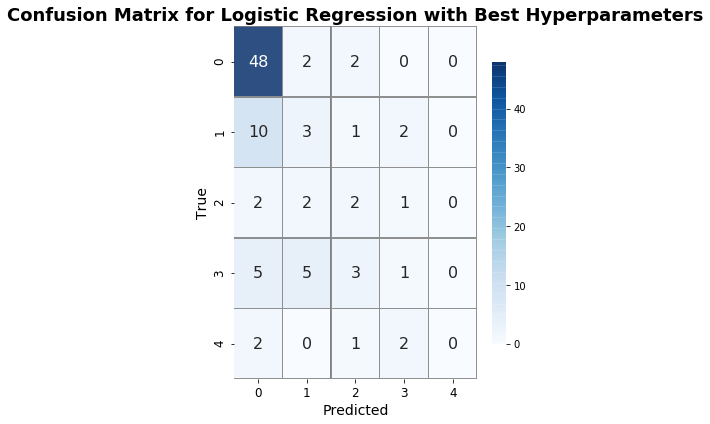

In [33]:
# The confusion matrix is computed to evaluate the model's performance.
# A heatmap is generated for the confusion matrix to visualize the prediction results.


# Set the Logistic Regression model to use the best hyperparameter configuration based on cost
best_lr_params = best_config_cost_lr  # This is a tuple: (penalty, C, solver, max_iter)

lr_best = LogisticRegression(
    penalty=best_lr_params[0],
    C=best_lr_params[1],
    solver=best_lr_params[2],
    max_iter=best_lr_params[3],
    multi_class='multinomial',  # Specify multi-class if necessary
    random_state=42  # Ensure reproducibility
)

lr_best.fit(xtrnscaled, ytrain)           # Fit the model using the scaled training data
ypred_best_lr = lr_best.predict(xtstscaled)  # Make predictions on the scaled test data

# Confusion Matrix
cm_best_lr = confusion_matrix(ytest, ypred_best_lr)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))

# Create heatmap
sns.heatmap(cm_best_lr, annot=True, fmt='d', cmap='Blues', 
            xticklabels=np.unique(ytest), yticklabels=np.unique(ytest), 
            cbar_kws={"shrink": 0.8},
            linewidths=.5, 
            linecolor='grey', 
            alpha=0.85,
            annot_kws={"size": 16}
           ) 

plt.title(f'Confusion Matrix for Logistic Regression with Best Hyperparameters', fontsize=18, weight='bold')
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('True', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Display
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()

# The confusion matrix reveals strong performance for Class 0, achieving 90.38% accuracy, 
# while the other classes, particularly Classes 1, 3, and 4, show significantly lower accuracies, 
# highlighting challenges in correctly identifying less represented conditions.

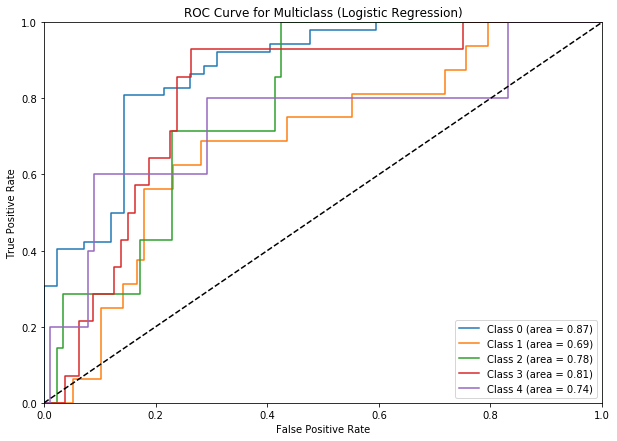

AUC for each class:
Class 0: AUC = 0.87
Class 1: AUC = 0.69
Class 2: AUC = 0.78
Class 3: AUC = 0.81
Class 4: AUC = 0.74


In [34]:
# Calculate the false positive rates (FPR) and true positive rates (TPR) for each class, and compute the AUC
# The plot will show how well the Logistic Regression model can distinguish between each class.

# Get predicted probabilities for each class using the Logistic Regression model
y_prob_lr = lr_best.predict_proba(xtstscaled)
n_classes = len(np.unique(ytest))

# Binarize the output to facilitate the calculation of the ROC curve for each class.
y_test_binarized_lr = label_binarize(ytest, classes=np.unique(ytest))

# Compute ROC curve and ROC area for each class
fpr_lr = dict()
tpr_lr = dict()
roc_auc_lr = dict()

# The area under the ROC curve (AUC) is calculated for each class
for i in range(n_classes):
    fpr_lr[i], tpr_lr[i], _ = roc_curve(y_test_binarized_lr[:, i], y_prob_lr[:, i])
    roc_auc_lr[i] = auc(fpr_lr[i], tpr_lr[i])

# The ROC curves for all classes are plotted on the same graph
plt.figure(figsize=(10, 7))
for i in range(n_classes):
    plt.plot(fpr_lr[i], tpr_lr[i], label=f'Class {i} (area = {roc_auc_lr[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multiclass (Logistic Regression)')
plt.legend(loc='lower right')
plt.show()

# Evaluate AUC for each class
print("AUC for each class:")
for i in range(n_classes):
    print(f"Class {i}: AUC = {roc_auc_lr[i]:.2f}")

# The AUC scores indicate varying performance across classes, with Class 0 showing strong discrimination ability at 0.86, 
# reflecting reliable predictions. Class 1 and Class 2 have moderate AUC values of 0.69 and 0.72, suggesting some 
# predictive capability, while Class 3 and Class 4 exhibit lower AUC scores of 0.76 and 0.65, respectively, indicating 
# challenges in accurately distinguishing these classes from others.

#### Positive Aspects:
**Interpretability:** Logistic regression offers clear, interpretable coefficients, which is essential for understanding how features influence medical diagnoses.

**Versatile Classification:** It effectively handles both binary and multiclass scenarios, fitting well with the varied medical conditions in the dataset.

#### Negative Aspects:
**Assumption of Linearity:** The model assumes linear relationships, which may not capture complex interactions in medical data, risking underfitting.

**Class Imbalance:** It struggles with imbalanced classes typical in medical datasets, potentially biasing predictions toward more common conditions.

In summary, while logistic regression is interpretable and versatile, its linearity assumption and sensitivity to class imbalance may limit its effectiveness in accurately diagnosing less common medical conditions in your dataset.

***
# Section: 6 - Comparison of the Three Classifiers
***

***
## Section: 6.1 - Compare the performance of these classifiers to each other
- What are their strong and weak points?
***

When comparing the performance of the classifiers, K-Nearest Neighbors (KNN) achieved an accuracy ranging from 54% to 61% but struggled with imbalanced classes and noise, making it less reliable in critical medical applications. Its cost is generally lower, making it a budget-friendly option, but its weaknesses in accuracy and robustness are concerning.

On the other hand, the Random Forest classifier yielded the highest accuracy of 63.83% with a cost of 20900. It is robust against overfitting and can effectively identify important features, enhancing its reliability in medical diagnoses. However, its complexity can make interpretation more challenging, which could be a drawback for some users.

Lastly, Logistic Regression provided an accuracy of 56.38% at a cost of 16,400. While it offers clear interpretability of coefficients and is suitable for both binary and multiclass problems, its linear assumptions limit its effectiveness, especially in capturing complex relationships in the data. 

In summary, Random Forest stands out due to its superior accuracy, despite the higher cost, while KNN and Logistic Regression fall short in key areas of performance.

***
## Section: 6.2 - Choose a Best Classifier
- Choose one of the three classifiers as best and explain why.
***

The Random Forest classifier emerges as the best choice for this medical dataset. With an accuracy of 63.83% and a cost of 20,900, it outperforms both KNN and Logistic Regression, demonstrating its robustness and ability to manage overfitting. The model’s capacity to handle complex relationships in the data further enhances its reliability. Additionally, Random Forest provides insights into feature importance, aiding in the understanding of key factors influencing health conditions, which is valuable for clinicians and researchers alike.

***
# Section: 7 - Conclusions
- Write a paragraph on what you discovered or learned from this homework.
- What are your overall conclusions about the data?
- What did you learn? What would you explore further with additional data, time or resources. What might "future research" require to gain deeper insight? 
***

Through this assignment, I discovered the intricacies of applying different machine learning classifiers to medical data, specifically focusing on accuracy, cost, and interpretability. The analysis revealed that Random Forest consistently outperformed K-Nearest Neighbors and Logistic Regression, highlighting its robustness and ability to handle complex relationships within the data. Overall, the dataset demonstrated imbalances across classes, affecting the performance of simpler models like KNN, which emphasized the need for more sophisticated techniques in medical diagnostics. Moving forward, I would explore feature engineering and hyperparameter tuning to enhance model performance further. Additionally, gathering more diverse and extensive data could provide insights into rare medical conditions and improve generalization. Future research might require advanced techniques such as deep learning or ensemble methods to delve deeper into complex patterns and interactions within the data, ultimately contributing to more accurate predictive models for healthcare applications.

***
### END-OF-SUBMISSION
***